In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from panotti.datautils import build_dataset

Using TensorFlow backend.


# Class Distribution

In [2]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def get_class_freq(root_path, y='', title='', color=sns.xkcd_rgb["denim blue"], plot=True):
    '''
    Returns a dataframe of class frequency distribution when structured in the Keras ImageDataGenerator manner for classification
    '''
    walker = os.walk(root_path)
    next(walker)
    class_freq = dict()
    for r, d, f in walker:
        class_freq[r.split('/')[-1]] = len(f)

    class_freq_df = pd.DataFrame.from_dict(
        class_freq, orient='index', columns=['count'])
    class_freq_df.reset_index(inplace=True)
    class_freq_df.columns = [y, 'count']
    class_freq_df.sort_values('count', axis=0, ascending=False, inplace=True)

    if plot:
        sns.catplot(x="count", y=y, kind="bar",
                    data=class_freq_df, color=color)
        plt.title(title)
        plt.show()
        return class_freq_df
    else:
        return class_freq_df

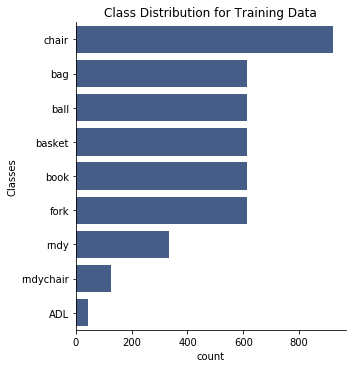

,Classes,count
5,chair,921
1,bag,614
2,ball,614
3,basket,614
4,book,614
6,fork,614
7,rndy,335
8,rndychair,124
0,ADL,45


In [3]:
get_class_freq('Preproc/Train/', y='Classes', title= 'Class Distribution for Training Data')

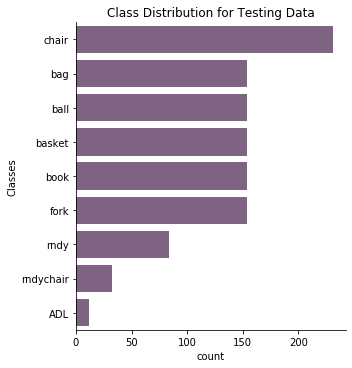

,Classes,count
5,chair,231
1,bag,154
2,ball,154
3,basket,154
4,book,154
6,fork,154
7,rndy,84
8,rndychair,32
0,ADL,12


In [4]:
get_class_freq('Preproc/Test/', y='Classes', title= 'Class Distribution for Testing Data', color=sns.xkcd_rgb["dusty purple"])

# Confusion Matrix

In [5]:
weights_path = 'weights.hdf5'
model = load_model(weights_path)















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [6]:
melgram_path = glob.glob('Preproc/Test/*/*.npz')

In [7]:
test_mel = melgram_path[0]

In [8]:
with np.load(test_mel) as data:
    melgram = data['melgram']

In [9]:
melgram.shape

(1, 96, 430, 8)

In [10]:
X_test, Y_test, paths, class_names = build_dataset('Preproc/Test/')

class_names =  ['ADL', 'bag', 'ball', 'basket', 'book', 'chair', 'fork', 'rndy', 'rndychair']
       total files =  1129 , going to load total_load =  1129
total files =  1129 , going to load total_load =  1129
   get_sample_dimensions: cook_d2_h100_rand_2.wav.npz: melgram.shape =  (1, 96, 430, 8)
 melgram dimensions:  (1, 96, 430, 8)

 Loading class 1/9: 'ADL', File 12/12: Preproc/Test/ADL/radio_d2_h100_rand_6.wav.npz                  
 Loading class 2/9: 'bag', File 154/154: Preproc/Test/bag/bag_d4h100_rand_2_8.wav.npz                  
 Loading class 3/9: 'ball', File 154/154: Preproc/Test/ball/ball_d2h100_free_7_22.wav.npz                  
 Loading class 4/9: 'basket', File 154/154: Preproc/Test/basket/basket_d4h0_kick_5_35.wav.npz                  
 Loading class 5/9: 'book', File 154/154: Preproc/Test/book/book_d2h50_rand_1_55.wav.npz                  
 Loading class 6/9: 'chair', File 231/231: Preproc/Test/chair/chair_d4h0_front_1_80.wav.npz                  
 Loading class 7/9

In [11]:
X_test.shape

(1129, 96, 430, 8)

In [12]:
pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

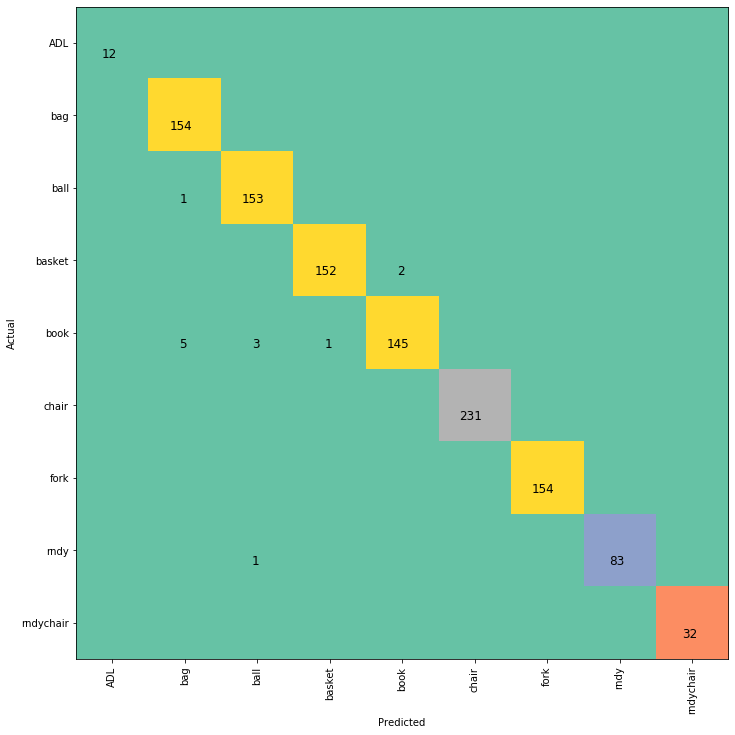

In [14]:
confusion_1 = confusion_matrix(np.argmax(Y_test, axis = -1), np.argmax(pred, axis = -1))
NUM_LABELS = len(class_names)

f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')
axes.grid(False)
axes.set_xticklabels(class_names, rotation = 90)
axes.set_yticklabels(class_names)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
plt.imshow(confusion_1, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(confusion_1):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')

In [16]:
print(round((1-(21/1120))*100, 2))
print(round((1-(13/1120))*100, 2))

98.12
98.84
